In [132]:
import pandas as pd
df = pd.read_csv('../Data/income_kmeansclustering.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


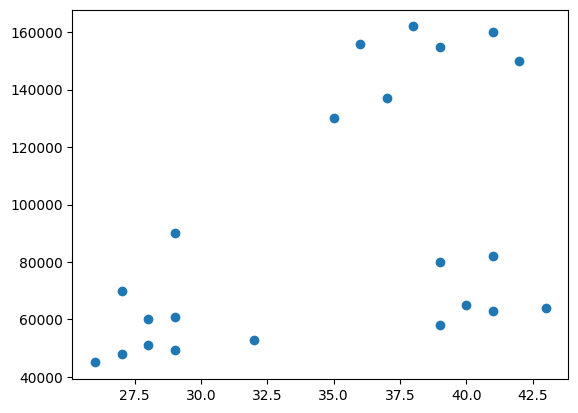

In [133]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df['Age'], df['Income($)'])

In [134]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [135]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [136]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [137]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

Text(0, 0.5, 'Income($)')

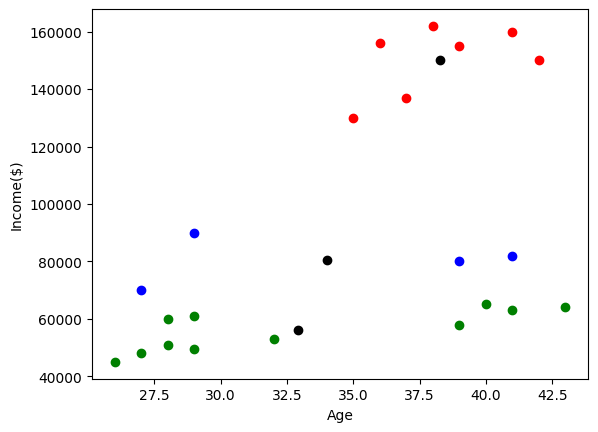

In [138]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'], df0['Income($)'], color='red')
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [140]:
scaler.fit(df[['Age']])
df['AgeScaled'] = scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df['IncomeScaled'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster,AgeScaled,IncomeScaled
0,Rob,27,70000,2,0.058824,0.213675
1,Michael,29,90000,2,0.176471,0.384615
2,Mohan,29,61000,1,0.176471,0.136752
3,Ismail,28,60000,1,0.117647,0.128205
4,Kory,42,150000,0,0.941176,0.897436


In [141]:
km = KMeans(n_clusters=3)
cluster = km.fit_predict(df[['AgeScaled', 'IncomeScaled']])
cluster

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [142]:
df['cluster'] = cluster
df.head()

,Name,Age,Income($),cluster,AgeScaled,IncomeScaled
0,Rob,27,70000,1,0.058824,0.213675
1,Michael,29,90000,1,0.176471,0.384615
2,Mohan,29,61000,1,0.176471,0.136752
3,Ismail,28,60000,1,0.117647,0.128205
4,Kory,42,150000,2,0.941176,0.897436


In [143]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'IncomeScaled')

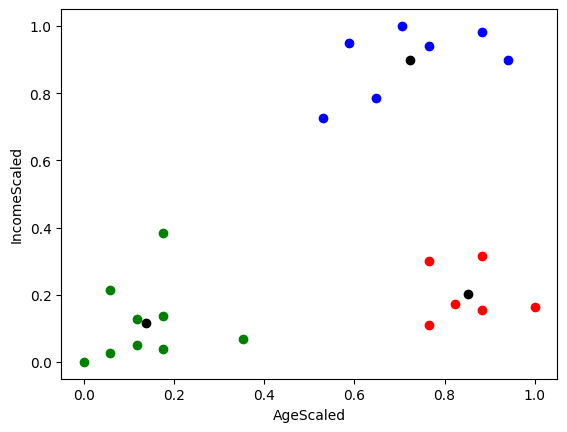

In [144]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['AgeScaled'], df0['IncomeScaled'], color='red')
plt.scatter(df1['AgeScaled'], df1['IncomeScaled'], color='green')
plt.scatter(df2['AgeScaled'], df2['IncomeScaled'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black')
plt.xlabel('AgeScaled')
plt.ylabel('IncomeScaled')

In [146]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['AgeScaled', 'IncomeScaled']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.33284248355621304,
 0.2614010378895557,
 0.18674336132118646,
 0.14716643104023697,
 0.11793228590762087]

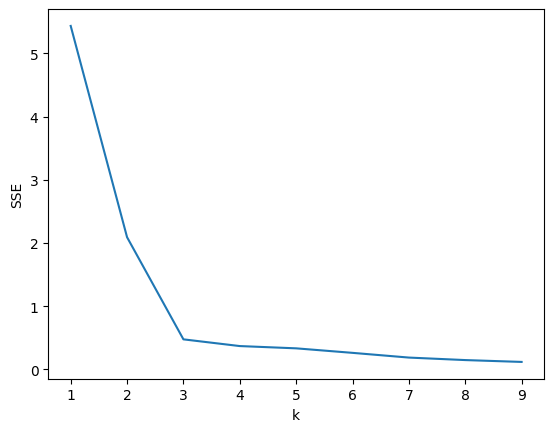

In [147]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_range, sse)